# 0. Get familar with data 

2020 Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software.

- survey_results_public.csv ：CSV file with main survey results, one respondent per row and one column per answer
- survey_results_schema.csv ：CSV file with survey schema, i.e., the questions that correspond to each column name

data source: https://insights.stackoverflow.com/survey


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_public = pd.read_csv("survey_results_public.csv")
df_scheme = pd.read_csv("survey_results_schema.csv")

In [2]:
df_public.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df_scheme.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [4]:
print("Number of survey results: ",df_public.shape[0])
print("\nType of data:")
print(df_public.dtypes)

Number of survey results:  64461

Type of data:
Respondent              int64
MainBranch             object
Hobbyist               object
Age                   float64
Age1stCode             object
                       ...   
WebframeWorkedWith     object
WelcomeChange          object
WorkWeekHrs           float64
YearsCode              object
YearsCodePro           object
Length: 61, dtype: object


# 1. What I want to know is ...

- Generally speaking, what factors do people pay more attention to when choosing jobs with the same compensation,benefits, and location ("JobFactors")?
- What are the most common programming languages("LanguageWorkedWith") used by data scientists?
- Which occupations work most heavily overtime("NEWOvertime")?

## 1.1 Important factors when choosing jobs (besides compensation,benefits, and location)

In [5]:
jobFactors = df_public["JobFactors"].dropna()
jobFactors

0        Languages, frameworks, and other technologies ...
3        Flex time or a flexible schedule;Office enviro...
5        Diversity of the company or organization;Langu...
7        Remote work options;Opportunities for professi...
8        Diversity of the company or organization;Remot...
                               ...                        
64146    Specific department or team I’d be working on;...
64148    Industry that I’d be working in;Languages, fra...
64150    Flex time or a flexible schedule;Languages, fr...
64152    Flex time or a flexible schedule;Languages, fr...
64153    Languages, frameworks, and other technologies ...
Name: JobFactors, Length: 49349, dtype: object

Text(0.5, 1.0, 'Job Factors')

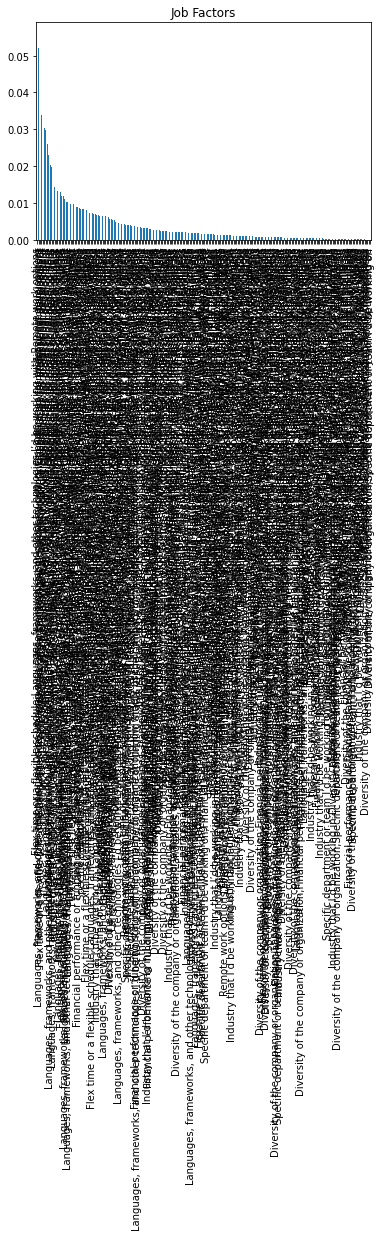

In [6]:
(jobFactors.value_counts()/jobFactors.shape[0]).plot(kind="bar");
plt.title("Job Factors")

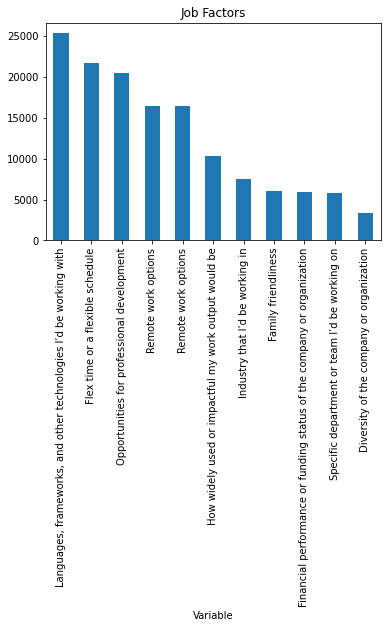

In [7]:
# Clearly we should clean the data

def clean_and_plot (df,col_name,list_possible_values,plot_title="",plot=True):
    '''
    PACKAGE
        @import pandas as pd
        @import matplotlib.pyplot as plt
    INPUT
        @df : the dataframe the contains the aimed column
        @col_name :  the name of the aimed colomn
        @list_possible_values : list of string; contains the possible values of new data
    OUTPUT:
        @traited dataframe colomn
        @plot 
    '''
    counted_df = df[col_name].value_counts().reset_index()
    counted_df.rename(columns={"index":"variable",col_name:"count"},inplace=True)
    
    lst_factors = []
    for factor in list_possible_values:
        count=0
        for i in range(counted_df.shape[0]):
            if factor in counted_df["variable"][i]:
                count += counted_df['count'][i]
        lst_factors.append([factor,count])
    df_factors = pd.DataFrame(lst_factors,columns=["Variable","Count"]).sort_values(by='Count',ignore_index=True,ascending=False)
    
    if plot:
        df_factors.plot(x="Variable",y="Count",kind='bar', legend=None,);
        plt.title(plot_title);
        plt.show()
    return df_factors
        

possible_values = ["Remote work options","Remote work options","Financial performance or funding status of the company or organization",
                   "Opportunities for professional development","Diversity of the company or organization",
                   "How widely used or impactful my work output would be","Industry that I’d be working in",
                   "Specific department or team I’d be working on","Flex time or a flexible schedule",
                   "Languages, frameworks, and other technologies I’d be working with","Family friendliness"]
df_jobFactors = clean_and_plot(df_public,"JobFactors",possible_values,"Job Factors")

In [8]:
df_jobFactors

,Variable,Count
0,"Languages, frameworks, and other technologies ...",25334
1,Flex time or a flexible schedule,21656
2,Opportunities for professional development,20421
3,Remote work options,16411
4,Remote work options,16411
5,How widely used or impactful my work output wo...,10277
6,Industry that I’d be working in,7574
7,Family friendliness,5986
8,Financial performance or funding status of the...,5892
9,Specific department or team I’d be working on,5805


## 1.2 What are the most common programming languages used by data scientists？

In [40]:
# Find the lines where there exits "data scientist" in the "DevType" colomn
df_DS = df_public.dropna(subset=["DevType"])
df_DS = df_DS[df_DS["DevType"].str.contains("Data scientist")]

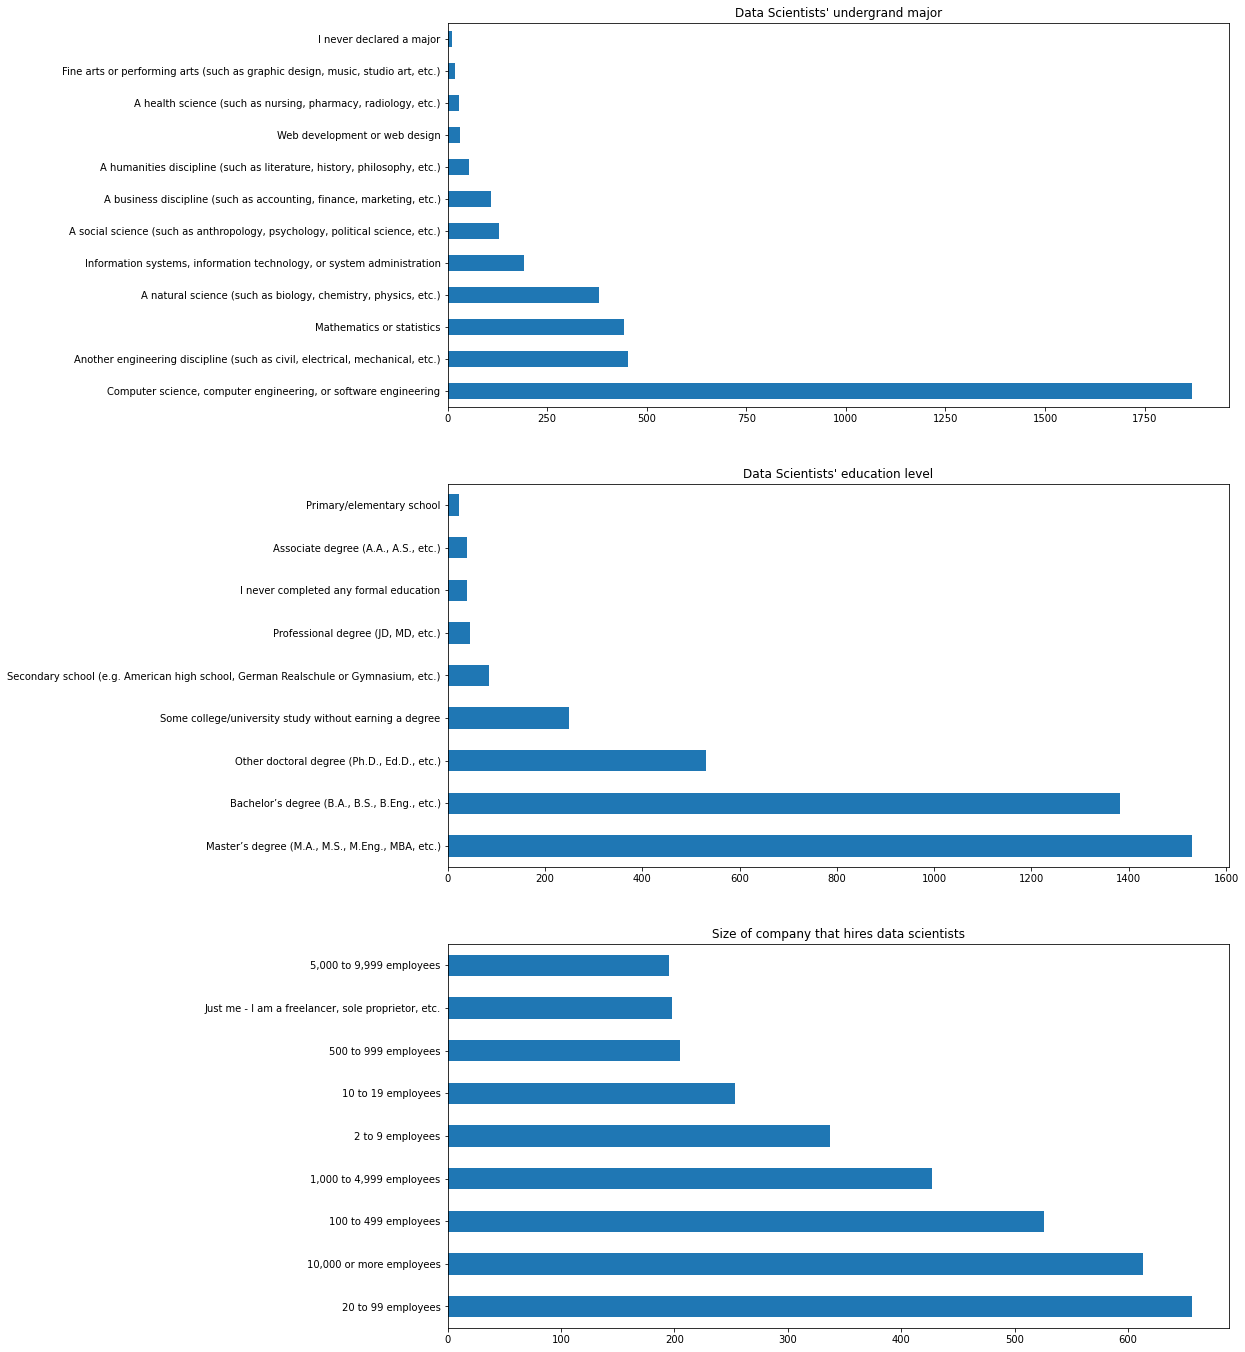

In [41]:
# Basic Facts about data scientists
plt.figure(figsize=(14,24))
plt.subplot(3,1,1)
df_DS["UndergradMajor"].value_counts().plot(kind="barh",title="Data Scientists' undergrand major")
plt.subplot(3,1,2)
df_DS["EdLevel"].value_counts().plot(kind="barh",title="Data Scientists' education level")
plt.subplot(3,1,3)
df_DS["OrgSize"].value_counts().plot(kind="barh",title="Size of company that hires data scientists")
plt.show()

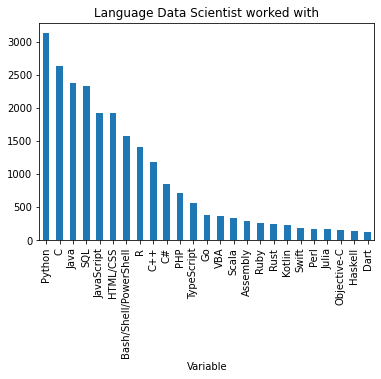

,Variable,Count
0,Python,3124
1,C,2629
2,Java,2374
3,SQL,2331
4,JavaScript,1925
5,HTML/CSS,1924
6,Bash/Shell/PowerShell,1578
7,R,1416
8,C++,1188
9,C#,851


In [12]:
possible_languages = ["Assembly","Bash/Shell/PowerShell","C","C#","C++","Dart","Go","Haskell","HTML/CSS",
                      "Java","JavaScript","Julia","Kotlin","Objective-C","Perl","PHP","Python","R","Ruby",
                      "Rust","Scala","SQL","Swift","TypeScript","VBA"]
clean_and_plot(df_DS,"LanguageWorkedWith",possible_languages,"Language Data Scientist worked with")

## 1.3 Which occupations work most heavily overtime?

In [9]:
df_job_overtime = df_public[["DevType","NEWOvertime"]].dropna().reset_index(drop=True)
df_job_overtime.head()

,DevType,NEWOvertime
0,"Developer, desktop or enterprise applications;...",Often: 1-2 days per week or more
1,"Designer;Developer, front-end;Developer, mobile",Never
2,"Developer, back-end;Developer, front-end;Devel...",Sometimes: 1-2 days per month but less than we...
3,"Developer, back-end;Developer, desktop or ente...",Occasionally: 1-2 days per quarter but less th...
4,"Developer, full-stack",Occasionally: 1-2 days per quarter but less th...


In [10]:
list_jobs = ["Academic researcher","Data or business analyst","Data scientist or machine learning specialist","Database administrator",
            "Designer","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",
            "Developer, front-end","Developer, full-stack","Developer, game or graphics","Developer, mobile","Developer, QA or test",
            "DevOps specialist","Educator","Engineer, data","Engineer, site reliability","Engineering manager","Marketing or sales professional",
            "Product manager","Scientist","Senior executive/VP","System administrator"]
list_overtime = ["Never","Rarely: 1-2 days per year or less","Occasionally: 1-2 days per quarter but less than monthly",
                "Sometimes: 1-2 days per month but less than weekly","Often: 1-2 days per week or more"]

In [28]:
def count_case_of_each_type(df,type_name,list_type,case_name,list_case,heatmap=True):
    '''
    PACKAGE
        @import pandas as pd 
        @import matplotlib.pyplot as plt 
        @import seaborn as sns
    INPUT
        @df : the dataframe the contains the aimed columns, where the "type" colomn is to be cleaned
        @type_name : str, the name of the colomn to be cleaned. Generally, the value of colomn is a string combines several types  
        @list_type : a list of possible value of the colomn `type_name`. In other word, the value of `type_name` colomn will be seperated into the value in `list_type` and be counted.
                     Besides, this list will be the index of output dataframe
        @case_name : str,the name of the colomn of cases to be counted.
        @list_case : a list of possible value of cases, which will be the colomn name of the output dataframe
    OUTPUT
        @ a dataframe with the index being `list_name` and colomn being `list_case`, and its value is the count of case of each type
        @ a heatmap if `heatmap=True`(by default)
    '''
    df_cleaned = clean_and_plot(df,type_name,list_type,plot=False)
    df_output = df_cleaned.rename(columns={"Variable":type_name}).set_index([type_name])
    for case in list_overtime:
        df_output[case]=0
        
    df_grouped =  df.groupby(by=[case_name])
    
    for group in df_grouped:
        case = group[0]
        series_types = group[1][type_name]
        for i in range(len(series_types)):
            types = (series_types.iloc[i]).split(';')
            df_output.loc[types,case] += 1
            
    df_radio = df_output.drop(["Count"],axis=1)
    df_radio = df_radio.div(df_output["Count"],axis=0)
    
    if heatmap:
        fig = plt.figure(figsize=(12,10))
        sns_plot = sns.heatmap(df_radio)
        plt.show()

    return df_output           
    

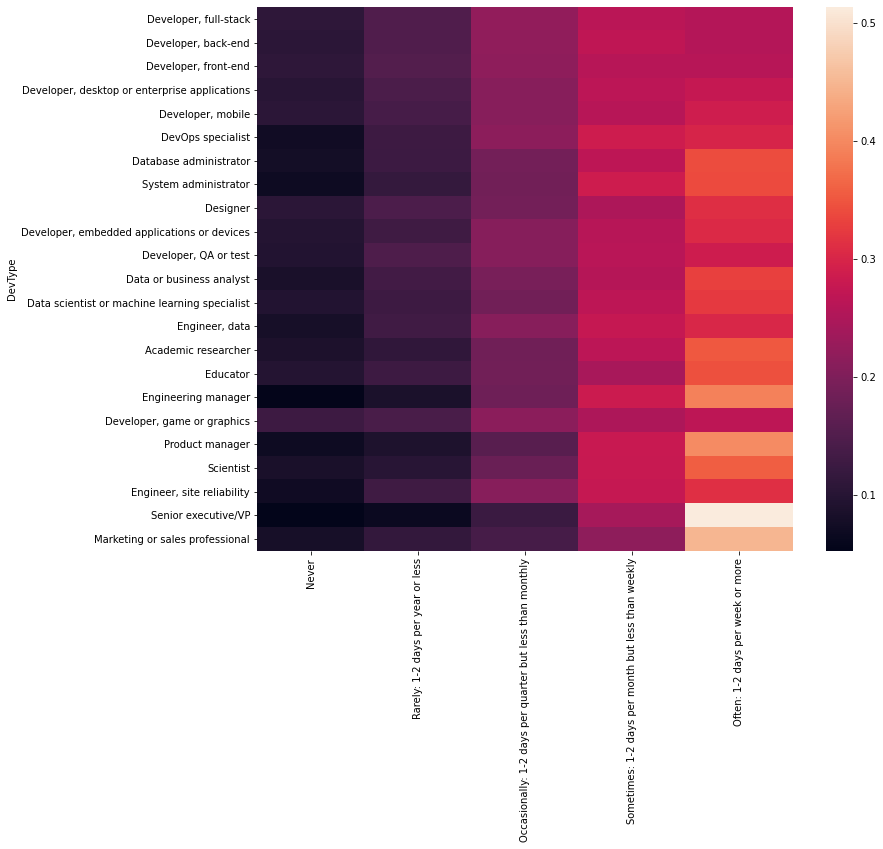

In [33]:
df_output = count_case_of_each_type(df_job_overtime,"DevType",list_jobs,"NEWOvertime",list_overtime) 

In [30]:
df_output

,Count,Never,Rarely: 1-2 days per year or less,Occasionally: 1-2 days per quarter but less than monthly,Sometimes: 1-2 days per month but less than weekly,Often: 1-2 days per week or more
DevType,,,,,,
"Developer, full-stack",24110,2623,3582,5325,6377,6203
"Developer, back-end",24092,2533,3598,5271,6485,6205
"Developer, front-end",15897,1739,2428,3450,4143,4137
"Developer, desktop or enterprise applications",10445,1074,1506,2195,2775,2895
"Developer, mobile",8074,852,1115,1694,2098,2315
DevOps specialist,5490,401,697,1186,1571,1635
Database administrator,4996,382,629,939,1342,1704
System administrator,4453,308,521,834,1274,1516
Designer,4263,449,622,806,1062,1324


From the heat map we can clearly find that for every occupation, more overtime is always more common.

Among them, "Senior executive/VP" works the most overtime.